# Speed dating dataset: relationships between variables 

In this notebook I :  
-  Analyzed the [speed dating dataset](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment) from the Kaggle competition:  
    -  I focused on certain variables and explored their relationship  
    e.g. Most important attributes between men and women  
    - Tried to identify the attributes which were the most important in getting a match


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import statistics

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('seaborn-white')
from pandas.plotting import parallel_coordinates
import dexplot as dxp

from sklearn.preprocessing import StandardScaler

from src.data_cleaning import field_coded_df, dating_coded_df, goals_coded_df, palette_20, scale_df_subset_fn

## Import data

In [2]:
eda_df_nodup = pd.read_csv('data/processed/Speed_Dating_Data.csv', encoding="unicode_escape")
print(eda_df_nodup.shape)
eda_df_nodup.head()

(551, 196)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,field_cd_name
0,1,1.0,Female,1,1,1,10,7,NaN,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Law
1,2,2.0,Female,3,1,1,10,3,NaN,10,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,Law
2,3,3.0,Female,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math
3,4,4.0,Female,7,1,1,10,6,NaN,3,...,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,Law
4,5,5.0,Female,9,1,1,10,4,NaN,1,...,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,Law


## Most Important Attributes  

Look at score of importance given to attributes that participants look for in the opposite sex.  
Rating given before speed dating (keys like: 'attr1_1')

### Comparison between gender

In [3]:
# Dataframe of attributes
attrs = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
eda_df_attrs = eda_df_nodup.copy().set_index('iid')
eda_df_attrs = eda_df_attrs[attrs]

# Drop cases where there are missing values
eda_df_attrs.dropna(inplace=True)
print(eda_df_attrs.shape)

# Scale scoring (since there are scores in scales 1-10 and 1-100)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Dataframe of scaled attributes
eda_df_attrs_scaled=pd.DataFrame(scaler.fit_transform(eda_df_attrs.T).T,columns=attrs)
eda_df_attrs_scaled.index = eda_df_attrs.index
eda_df_attrs_scaled.head()


(541, 6)


,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,
1,-0.707107,1.414214,1.414214,-0.707107,-0.707107,-0.707107
2,1.833157,-0.754829,0.539164,0.215666,-1.078328,-0.754829
3,1.364382,-0.496139,1.364382,-0.496139,-0.496139,-1.240347
4,0.707107,0.707107,0.707107,0.707107,-1.414214,-1.414214
5,0.447214,-1.565248,1.118034,1.118034,-0.894427,-0.223607


[Text(0.5, 1.0, 'Importance given to attributes betwwen genders (n= 541 participants)'),
 Text(0.5, 0, 'Attributes'),
 Text(0, 0.5, 'Scaled score of importance')]

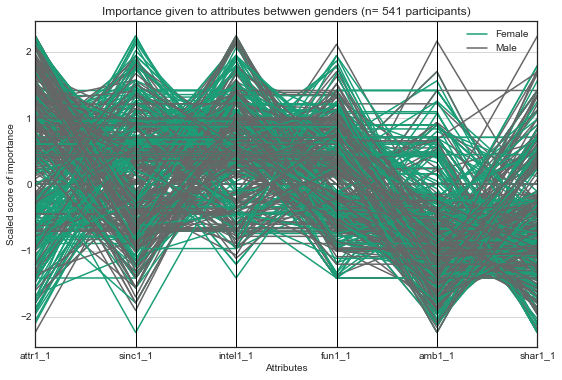

In [4]:
# Plot scaled scores of attributes for all participants. Compare by gender

# Add gender column to dataframe to plot
cols_plot = ['gender']
data_plot = eda_df_attrs_scaled.merge(eda_df_nodup[cols_plot],left_index=True, right_index=True)

# Parallel coordinates plot
fig = plt.figure(figsize = (9,6))
fig = parallel_coordinates(data_plot, 'gender', colormap=plt.get_cmap("Dark2"))
fig.set(title='Importance given to attributes betwwen genders (n= 541 participants)', xlabel='Attributes', ylabel='Scaled score of importance')

In [5]:
# Mean score of importance of attributes. Compare between genders
data_plot = data_plot.groupby('gender').mean().T
data_plot['attribute'] = data_plot.index.tolist()
data_plot

gender,Female,Male,attribute
attr1_1,0.018090,0.763871,attr1_1
sinc1_1,0.372645,0.045550,sinc1_1
intel1_1,0.674839,0.503306,intel1_1
fun1_1,0.151772,0.178680,fun1_1
amb1_1,-0.545775,-0.906142,amb1_1
shar1_1,-0.671570,-0.585265,shar1_1


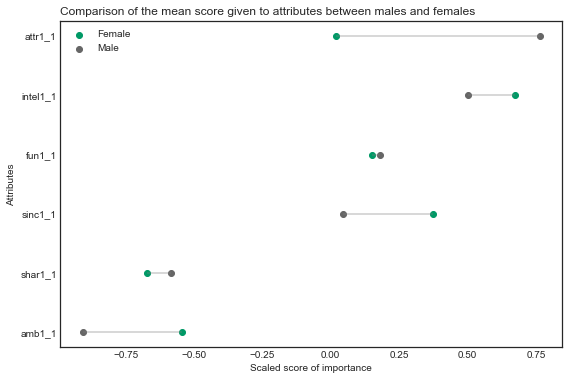

In [6]:
# Plot mean score of importance of attributes. Use lollipop plot for 2 groups to compare
plt.figure(figsize = (9,6))

# Reorder plot on highest scored attribute by males:
data_plot_ord = data_plot.sort_values(by='Male')
group_range=range(1,len(data_plot.index)+1)
 
# Create horizontal plot using hlines
# Create scatter plot indicating mean scores for attributes
plt.hlines(y=group_range, xmin=data_plot_ord['Female'], xmax=data_plot_ord['Male'], color='grey', alpha=0.4)
plt.scatter(data_plot_ord['Female'], group_range, color='#009966', alpha=1, label='Female')
plt.scatter(data_plot_ord['Male'], group_range, color='#666666', alpha=1 , label='Male')
plt.legend()
 
# Add title and axis names
plt.yticks(group_range, data_plot_ord['attribute'])
plt.title("Comparison of the mean score given to attributes between males and females", loc='left')
plt.xlabel('Scaled score of importance')
plt.ylabel('Attributes')

plt.show()

### Comparison between race

In [7]:
# Create dataframe of attributes scores per race per gender
cols_plot = ['gender', 'race']
data_plot = eda_df_attrs_scaled.merge(eda_df_nodup[cols_plot],left_index=True, right_index=True)

#data_plot = data_plot.groupby(['gender','race']).mean().T
# Melt dataframe (pivot longer) to plot attribute scores by race and gender
data_plot =data_plot.melt(['gender', 'race'],var_name= 'attribute',value_name='attr_scaled_score')
data_plot

,gender,race,attribute,attr_scaled_score
0,Female,Caucasian_American,attr1_1,-0.707107
1,Female,Caucasian_American,attr1_1,1.833157
2,Female,Caucasian_American,attr1_1,1.364382
3,Female,Caucasian_American,attr1_1,0.707107
4,Female,Asian_American,attr1_1,0.447214
...,...,...,...,...
3229,Male,Caucasian_American,shar1_1,-1.055290
3230,Male,Caucasian_American,shar1_1,-0.208514
3231,Male,Caucasian_American,shar1_1,0.267261
3232,Male,African American,shar1_1,0.447214


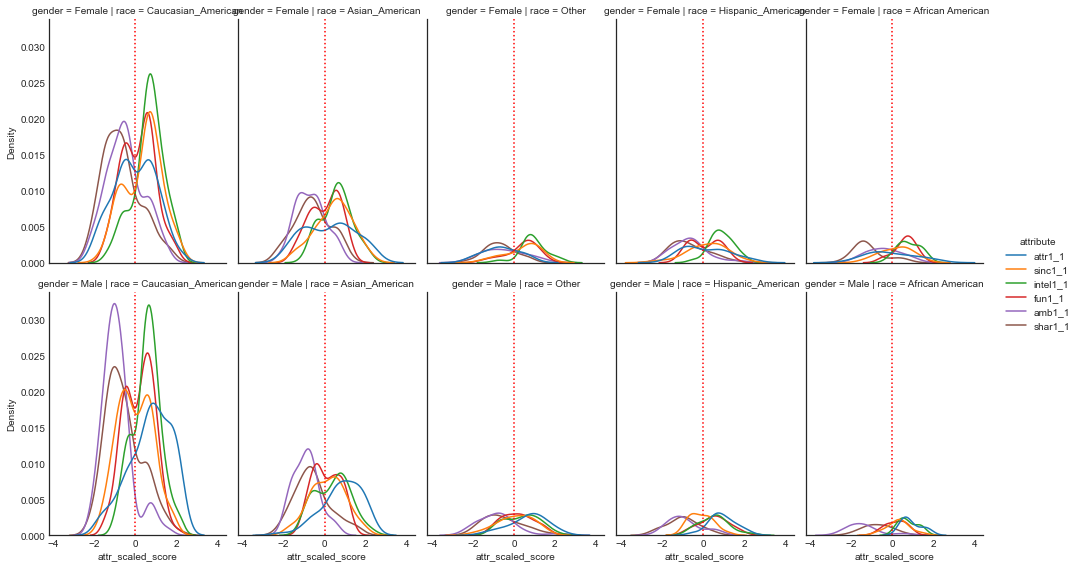

In [8]:
# Distribution of attribute scores per race per gender. Density plot
g = sns.displot(x="attr_scaled_score", 
                hue="attribute", col="race",
                row='gender',
                data=data_plot, kind="kde",
                height=4, aspect=.7)

line_position = [0]*10

for ax, pos in zip(g.axes.flat, line_position):
    ax.axvline(x=pos, color='r', linestyle=':')

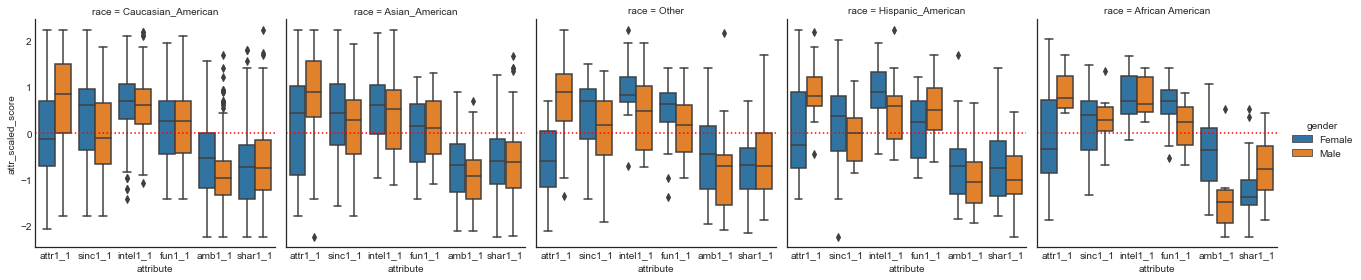

In [9]:
# Distribution of attribute scores per race per gender. Box plot
fig = sns.catplot(x="attribute", y="attr_scaled_score",
                hue="gender", col="race",
                data=data_plot, kind="box",
                col_wrap=5, height=4, aspect=0.9)

line_position = [0]*5

for ax, pos in zip(fig.axes.flat, line_position):
    ax.axhline(y=pos, color='r', linestyle=':')

In [10]:
data_plot.groupby(['gender','race','attribute']).mean()

attr_scaled_score
gender race               attribute                   
Female African American   amb1_1             -0.403762
                          attr1_1            -0.050715
                          fun1_1              0.613136
                          intel1_1            0.801189
                          shar1_1            -1.145025
                          sinc1_1             0.185177
       Asian_American     amb1_1             -0.681586
                          attr1_1             0.229915
                          fun1_1              0.011073
                          intel1_1            0.573663
                          shar1_1            -0.584310
                          sinc1_1             0.451245
       Caucasian_American amb1_1             -0.488350
                          attr1_1            -0.013449
                          fun1_1              0.143313
                          intel1_1            0.639265
                          shar1_1            -0.660992
                          sinc1_1             0.380213
       Hispanic_American  amb1_1             -0.654598
                          attr1_1             0.135324
                          fun1_1              0.096866
                          intel1_1            0.893252
                          shar1_1            -0.660269
                          sinc1_1             0.189425
       Other              amb1_1             -0.474081
                          attr1_1            -0.613700
                          fun1_1              0.401333
                          intel1_1            0.936723
                          shar1_1            -0.672243
                          sinc1_1             0.421968
Male   African American   amb1_1             -1.422550
                          attr1_1             0.927146
                          fun1_1              0.166843
                          intel1_1            0.769314
                          shar1_1            -0.734384
                          sinc1_1             0.293631
       Asian_American     amb1_1             -0.903659
                          attr1_1             0.831534
                          fun1_1              0.090076
                          intel1_1            0.395712
                          shar1_1            -0.567070
                          sinc1_1             0.153408
       Caucasian_American amb1_1             -0.890409
                          attr1_1             0.719244
                          fun1_1              0.177042
                          intel1_1            0.542319
                          shar1_1            -0.546285
                          sinc1_1            -0.001911
       Hispanic_American  amb1_1             -0.901651
                          attr1_1             0.925304
                          fun1_1              0.526922
                          intel1_1            0.538121
                          shar1_1            -0.997779
                          sinc1_1            -0.090915
       Other              amb1_1             -0.801977
                          attr1_1             0.697673
                          fun1_1              0.184444
                          intel1_1            0.388223
                          shar1_1            -0.539020
                          sinc1_1             0.070656

### Comparison between fields of study

In [11]:
# Create dataframe of attributes scores per race per gender
cols_plot = ['gender', 'field_cd']
data_plot = eda_df_attrs_scaled.merge(eda_df_nodup[cols_plot],left_index=True, right_index=True)

from src.data_cleaning import field_coded_df
data_plot= data_plot.merge(field_coded_df, how='left', on='field_cd')

# Melt dataframe (pivot longer) to plot attribute scores by race and gender
data_plot =data_plot.melt(['gender', 'field_cd_name'],var_name= 'attribute',value_name='attr_scaled_score')
data_plot.drop(data_plot[data_plot.attribute =='field_cd'].index, inplace=True)
data_plot

,gender,field_cd_name,attribute,attr_scaled_score
0,Female,Law,attr1_1,-0.707107
1,Female,Math,attr1_1,1.833157
2,Female,Law,attr1_1,1.364382
3,Female,Law,attr1_1,0.707107
4,Female,Law,attr1_1,0.447214
...,...,...,...,...
3229,Male,Business/Econ/Finances,shar1_1,-1.055290
3230,Male,Business/Econ/Finances,shar1_1,-0.208514
3231,Male,Business/Econ/Finances,shar1_1,0.267261
3232,Male,Business/Econ/Finances,shar1_1,0.447214


Distribution of attribute score per field of study


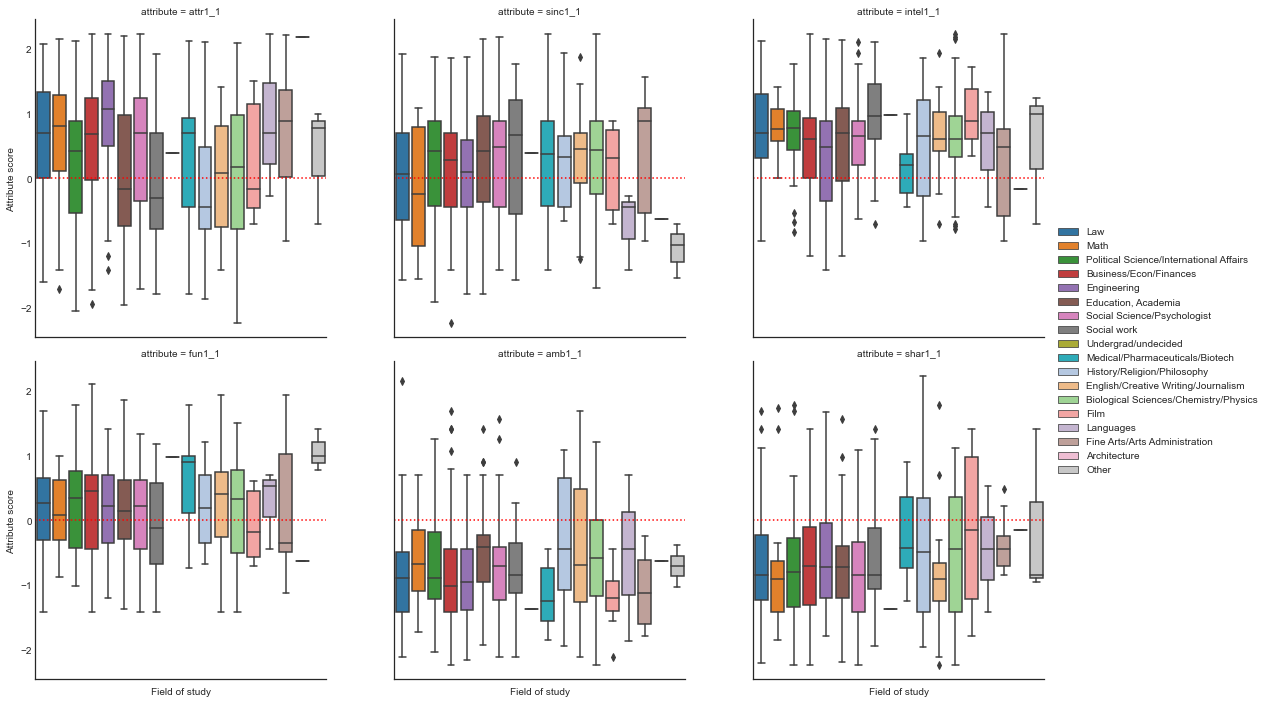

In [12]:
from src.data_cleaning import palette_20
fig = sns.catplot(x='field_cd_name', y="attr_scaled_score", 
                hue="field_cd_name", col="attribute",dodge=False,
                data=data_plot,kind = 'box',col_wrap=3,
                palette= palette_20[:data_plot.field_cd_name.nunique()])

# Add horizontal line
line_position = [0]*data_plot.attribute.nunique()

for ax, pos in zip(fig.axes.flat, line_position):
    ax.axhline(y=pos, color='r', linestyle=':')

# Add title and axis names
fig.set(xticklabels=[], xlabel = 'Field of study', ylabel='Attribute score')
fig.add_legend()
print('Distribution of attribute score per field of study')              

  field_cd_name attribute  attr_scaled_score
0  Architecture    amb1_1          -0.624695
1  Architecture   attr1_1           2.186433
2  Architecture    fun1_1          -0.624695
3  Architecture  intel1_1          -0.156174
4  Architecture   shar1_1          -0.156174
Mean attribute score per field of study


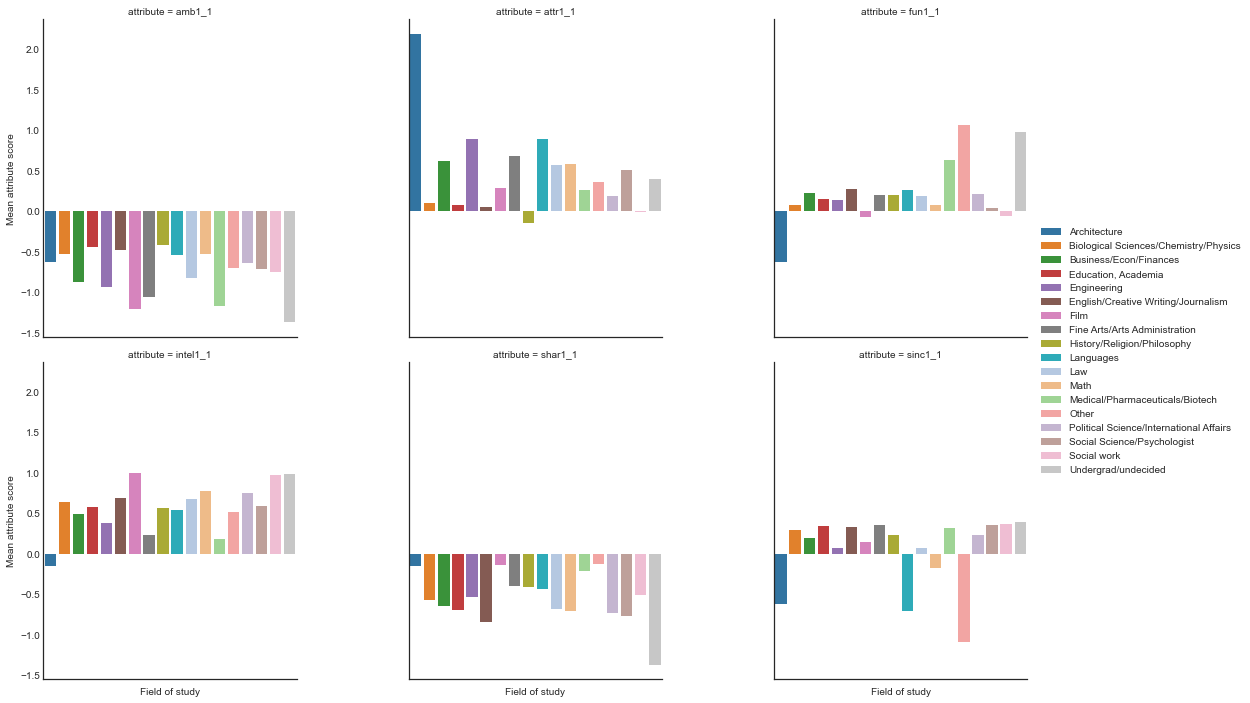

In [13]:
# Plot mean attribute scores between fields of study for better visualization
data_plot = data_plot.groupby(['field_cd_name','attribute']).mean().reset_index()
data_plot.drop(data_plot[data_plot.attribute =='field_cd'].index, inplace=True)
print(data_plot.head())

fig = sns.catplot(x='field_cd_name', y="attr_scaled_score", 
                hue="field_cd_name", col="attribute",dodge=False,
                data=data_plot,kind = 'bar',col_wrap=3,
                palette= palette_20[:data_plot.field_cd_name.nunique()])
fig.set(xticklabels=[], xlabel = 'Field of study', ylabel='Mean attribute score')
fig.add_legend()
print('Mean attribute score per field of study')


## Attribute importance evolution

Look at evolution of scores of importance for attributes at two different timepoints:  
- '_s': halfway trhough the speed dating    
- '_3': 3-4 weeks after having seen their date



In [14]:
# Subset dataframe of scores of chosen attributes
from src.data_cleaning import scale_df_subset_fn

attrs_s = ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']
attrs_3 = ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']

# Scale scores for comparison
eda_df_attrs_scaled = scale_df_subset_fn(eda_df_nodup.copy(),cols = attrs+ attrs_s+ attrs_3 )
print(eda_df_attrs_scaled.shape)
eda_df_attrs_scaled.head()

(135, 18)


,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3
iid,,,,,,,,,,,,,,,,,,
133,-1.655115,1.055186,0.150336,0.150336,-0.754513,1.055186,-1.655115,0.150336,1.055186,0.150336,-0.754513,1.055186,-2.254099,0.643118,0.643118,0.643118,-0.321205,0.643118
134,-2.233330,0.744195,0.744195,0.248313,0.744195,-0.247569,-2.233330,1.240077,0.744195,0.248313,0.248313,-0.247569,-1.596725,0.531993,0.531993,0.531993,0.531993,-0.531249
135,0.469517,1.882206,0.469517,-0.940068,-0.940068,-0.940068,0.469517,1.882206,0.469517,-0.940068,-0.940068,-0.940068,0.109358,1.432008,0.770683,-0.551967,-1.210187,-0.551967
139,0.363575,0.000678,0.363575,0.726471,-0.726859,-0.726859,1.246390,1.246390,-0.414559,1.246390,-2.492489,-0.831540,0.337404,0.337404,0.743918,0.743918,-1.689930,-0.473878
142,-0.646724,-0.646724,1.296624,1.296624,0.648841,-1.945011,-0.567793,0.001058,1.133317,1.133317,-0.567793,-1.133922,-0.205797,0.412047,1.029890,1.029890,-0.823640,-1.444205


In [15]:
# Prepare dataframe for plotting: melt (pivot wode to long)
df_plot = eda_df_attrs_scaled.melt( var_name='attribute', value_name='attr_scaled_score', ignore_index=False)
df_plot.reset_index(inplace=True)
df_plot[['attribute','timepoint']] = df_plot['attribute'].str.split('_',expand=True)
df_plot.head()

,iid,attribute,attr_scaled_score,timepoint
0,133,attr1,-1.655115,1
1,134,attr1,-2.233330,1
2,135,attr1,0.469517,1
3,139,attr1,0.363575,1
4,142,attr1,-0.646724,1


Scaled attribute score distribution: comparison at the start(1) the middle(s) and 3 weeks (3) after speed dating


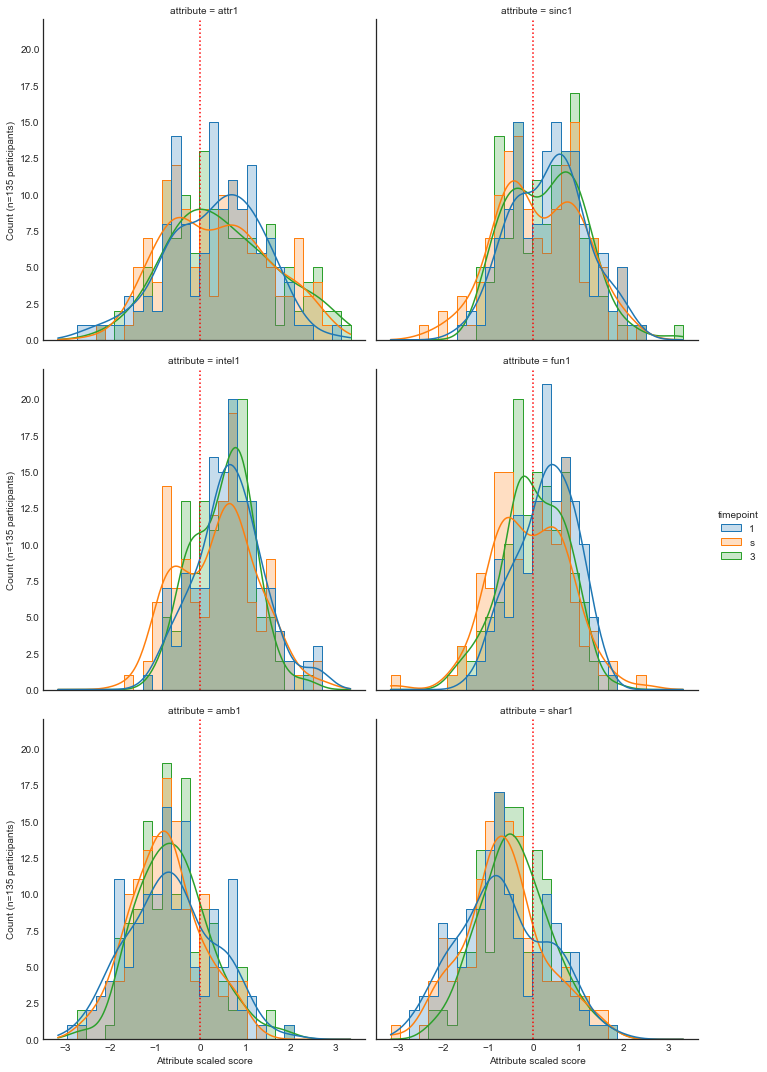

In [16]:
# Plot histograms of score distribution. Compare between two timepoints for each attribute
fig = sns.displot(data=df_plot, x="attr_scaled_score", hue="timepoint",col='attribute', element='step', kde=True, col_wrap=2)
fig.set(xlabel='Attribute scaled score',ylabel='Count (n={} participants)'.format(df_plot.iid.nunique()))
# Add vertical line at 0
line_position = [0]*6

for ax, pos in zip(fig.axes.flat, line_position):
    ax.axvline(x=pos, color='r', linestyle=':')

print('Scaled attribute score distribution: comparison at the start(1) the middle(s) and 3 weeks (3) after speed dating')

## Attributes of participants getting matched

In [18]:
attrs_decision = ['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']

# Scale scores for comparison
eda_df_attrs_scaled = scale_df_subset_fn(eda_df_nodup.copy(),cols = attrs_decision)
print(eda_df_attrs_scaled.shape)
eda_df_attrs_scaled.head()

(124, 6)


,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2
iid,,,,,,
381,1.979899,-0.141421,0.282843,-0.141421,-0.989949,-0.989949
383,1.336306,-0.267261,0.534522,-0.267261,0.534522,-1.870829
384,1.788854,-0.894427,-0.894427,0.447214,-0.894427,0.447214
386,-0.707107,1.414214,1.414214,-0.707107,-0.707107,-0.707107
387,0.894427,0.894427,-0.447214,0.894427,-1.788854,-0.447214


In [19]:
# Dataframe for plotting: Add decision of participant to date or not to date partner (dec)
df_plot = eda_df_attrs_scaled.reset_index()
df_plot= df_plot.merge(eda_df_nodup[['dec', 'iid', 'gender']], how='left', on='iid')

df_plot_male = df_plot[df_plot.gender=='Male']
df_plot_female = df_plot[df_plot.gender=='Female']

Text(0.5, 1.0, 'Correlation Heatmap: Attribute score given to importance when taking decision. Males')

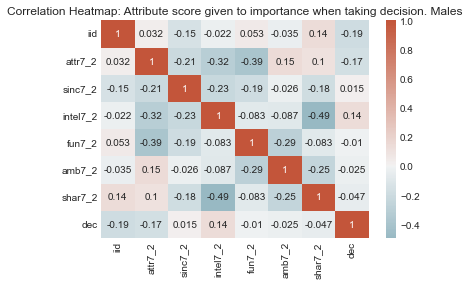

In [20]:
# Calculate correlation between attribute score values and decision taken by participant (0 = no; 1 = yes)
corr_male = df_plot_male.corr(method='spearman')
corr_female = df_plot_female.corr(method='spearman')

# Plot heatmap of correlations for males
heatmap = sns.heatmap(corr_male, annot=True,
            xticklabels=corr_male.columns.values,
            yticklabels=corr_male.columns.values, center=0, cmap=sns.diverging_palette(220, 20,  as_cmap=True))
heatmap.set_title('Correlation Heatmap: Attribute score given to importance when taking decision. Males')
            


Text(0.5, 1.0, 'Correlation Heatmap: Attribute score given to importance when taking decision. Females')

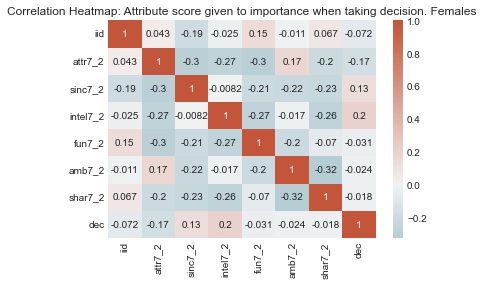

In [21]:
# Plot heatmap of correlations for females
heatmap = sns.heatmap(corr_female, annot=True,
            xticklabels=corr_female.columns.values,
            yticklabels=corr_female.columns.values, center=0, cmap=sns.diverging_palette(220, 20,  as_cmap=True))
heatmap.set_title('Correlation Heatmap: Attribute score given to importance when taking decision. Females')

## Goal of participating at event and matching rate

In [22]:
goals_ls = ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other']
goals_coded_df = pd.DataFrame({'goal': range(1,len(goals_ls)+1), 'goal_name': goals_ls}) 

In [23]:
# Import original dataframe
speed_df = pd.read_csv("data/raw/Speed Dating Data.csv",encoding="unicode_escape" )

# Update coded goals
from src.data_cleaning import goals_coded_df

speed_df = speed_df.merge(goals_coded_df, how='left', on='goal')

Relative match frequency per speed-dating night goal group


/Users/aura.moreno/Documents/Jedha/jedha_env/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


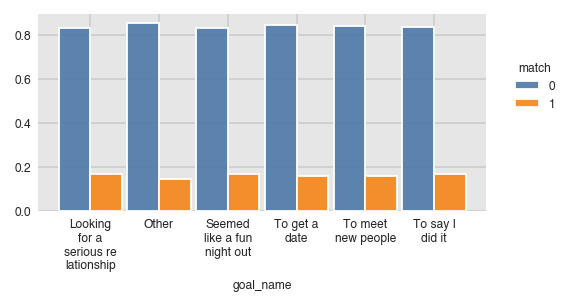

In [24]:
# Plot relative frequencies for the number of matches found depending on the goal of the person for the dating night
import dexplot as dxp
fig = dxp.count('goal_name', data=speed_df, split='match', normalize='goal_name')
print('Relative match frequency per speed-dating night goal group')
fig

## Frequency of going out on dates and matching rate

Relative match frequency per speed-dating night dating habits group


/Users/aura.moreno/Documents/Jedha/jedha_env/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


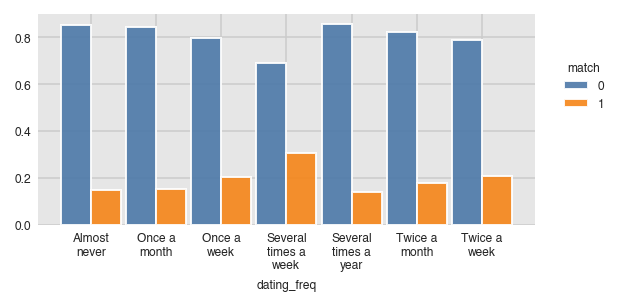

In [25]:
# Update coded dating habits
from src.data_cleaning import dating_coded_df
speed_df = speed_df.merge(dating_coded_df, how='left', on='date')

# Plot relative frequencies for the number of matches found depending on the dating habits of the participant
print('Relative match frequency per speed-dating night dating habits group')
dxp.count('dating_freq', data=speed_df, split='match', normalize='dating_freq')


## Conclusions  

### Important attributes for dating  

- Men give greater importance to attractiveness than women  
- Women give greater importance to sincerity  
- Both men and women give similar importance to being fun  
- Both men and women give a more or less similar importance to intelligence, with women giving slightly more importance     
<br>
- African-american and hispanic-american  men give a lot of importance to attractiveness, compared to other races  
- Hispanic-american women give the most importance to intelligence compared to other races  
<br>
- Participants with a field of study ‘social work’ and ‘education/academia’ give less importance to attractiveness  
- Participants from a mathematical field of study give greater importance to intelligence  
- The distribution of scores for the importance of the date being fun is similar amongst many different fields of study  

- On average, it is the people studying architecture that give the greatest importance to attractiveness, and the people sudying history/religion/philosophy, the least importance  	
- On average, people studying architecture, languages and other fields of study give little importance to sincerity  
<br>
### Evolution of importance of attributes

- Participants at the start of the night give the greatest importance to attractiveness, being fun and more or less to intellingence   
 
- As the night goes on, people start giving less importance to attractiveness, sincerity and for a certain group of participants, intelligence. They start to give more importance to shared interests  
- Three to four weeks after, people  give stronger importance to intelligence,  and shared attributes  
<br>
### Attributes and success of date
- Despite attractiveness being ruled as important for the majority of men, this is not what appeared to play a role in taking the decision to see their partner again  

- Women stayed coherent with the main attributes they declared as important when taking the decision to see partner again: intelligence and sincerity 
<br> 
### Goal and dating habits and success of date
- There appeared to be no strong difference between the rates of matched dates and the goal of the participant for the night    

- People that would normally date several times a week appeared to have the highest proportion of matched compared to people with other dating habits  